<a href="https://colab.research.google.com/github/Lakshya9775g/HappyShop/blob/main/NSL_KDD(train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nslkdd:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F174616%2F394223%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T191850Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D14147cd6c4ab56ec493448ae436836a940160dbdecce09899fc3830f93bd23c5456fea1788d7fd14122bece5ae7b089495558cb889464ee5c2e55765479a7b9baa7a5655f0dcf2955be7a8b026f0c382a80b7d8642d99af46e2965f564e1931090cb6dd5133ccf41c3c7ab5b75040b79a616ba903db70dadfed55bff204c337c918438c6a9a1a5036411503a189e2abdd368b2c711139ff6a7865b64201337968f4d06a09010fc3fec03b6f9c513a8a02e6496a8d666391f8261c9325445889052e21a9020919f23683560c7860b336c9f12f2783a3599d1dd6d03bb1deb77838d9092b2973cdac17aa85fbd8e02bab348799fb676249634fcaf2fb7e40e975f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 14529600 bytes downloaded
Downloaded and uncompressed: nslkdd
Data source import complete.


<a href="https://colab.research.google.com/github/razor08/Network-IDS-Paper/blob/master/NSL-KDD-Categorical/NSL_KDD_Multi_Category_k%3D6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [ ]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)


2.0.3
1.25.2
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.2.2


In [ ]:
df = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt")
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
#Loading training set into dataframe
qp = pd.read_csv("/kaggle/input/nslkdd/KDDTest+.txt")
qp.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [ ]:
#Reset column names for training set
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
#Reset column names for testing set
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
from tabulate import tabulate
import pandas as pd

# # Assuming df is your DataFrame
# # Example DataFrame
# data = {'A': [1, 2, 3], 'B': [4.0, 5.0, 6.0], 'C': ['x', 'y', 'z']}
# df = pd.DataFrame(data)

# Print types of columns in a table
print(tabulate(df.dtypes.reset_index(), headers=['Column Name', 'Data Type'], tablefmt='pipe'))


|    | Column Name                 | Data Type   |
|---:|:----------------------------|:------------|
|  0 | duration                    | int64       |
|  1 | protocol_type               | object      |
|  2 | service                     | object      |
|  3 | flag                        | object      |
|  4 | src_bytes                   | int64       |
|  5 | dst_bytes                   | int64       |
|  6 | land                        | int64       |
|  7 | wrong_fragment              | int64       |
|  8 | urgent                      | int64       |
|  9 | hot                         | int64       |
| 10 | num_failed_logins           | int64       |
| 11 | logged_in                   | int64       |
| 12 | num_compromised             | int64       |
| 13 | root_shell                  | int64       |
| 14 | su_attempted                | int64       |
| 15 | num_root                    | int64       |
| 16 | num_file_creations          | int64       |
| 17 | num_shells              

In [ ]:
#accessing names of training columns
lst_names = df.columns # returns a list of column names
lst_names


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
#accessing names of testing columns
testlst_names = qp.columns
testlst_names

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level'],
      dtype='object')

In [ ]:
#Dropping the last columns of training set
df = df.drop('difficulty_level', axis=1) # we don't need it in this project
df.shape

(125972, 42)

In [ ]:
#Dropping the last columns of testing set
qp = qp.drop('difficulty_level', axis = 1)
qp.shape

(22543, 42)

In [ ]:
df.isnull().values.any()

False

In [ ]:
qp.isnull().values.any()

False

In [ ]:
#defining col list
cols = ['protocol_type','service','flag']
cols

['protocol_type', 'service', 'flag']

In [ ]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, axis = 1)
    return df


In [ ]:
#Merging train and test data
combined_data = pd.concat([df,qp])
combined_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
22539,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Columns: 123 entries, duration to flag_SH
dtypes: bool(84), float64(15), int64(23), object(1)
memory usage: 57.2+ MB


In [ ]:
# combined_data.info()
column_names = combined_data.columns.tolist()
print(column_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'subclass', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'servic

In [ ]:
import numpy as np

def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = max(df[feature_name])
        min_value = min(df[feature_name])
        if max_value != min_value:
            normalized_values = [(value - min_value) / (max_value - min_value) for value in df[feature_name]]
            result[feature_name] = normalized_values
        else:
            # Handling the case where max_value == min_value (all values are same)
            # In this case, setting all values to 0 is a common choice
            result[feature_name] = [0] * len(df[feature_name])
    return result


In [ ]:
#Dropping subclass column for training set

tmp = combined_data.pop('subclass')

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148515 entries, 0 to 22542
Columns: 122 entries, duration to flag_SH
dtypes: bool(84), float64(15), int64(23)
memory usage: 56.1 MB


In [ ]:
#Normalizing training set
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22539,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22540,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22541,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Fixing labels for training set
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in tmp:
    if item in check1:
        classlist.append("DoS")
        DoSCount=DoSCount+1
    elif item in check2:
        classlist.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in check3:
        classlist.append("U2R")
        U2RCount=U2RCount+1
    elif item in check4:
        classlist.append("R2L")
        R2LCount=R2LCount+1
    else:
        classlist.append("Normal")
        NormalCount=NormalCount+1

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named df with a categorical column 'category'
# # Replace 'df' and 'category' with your actual DataFrame and column name

# # Example DataFrame
# # data = {'category': ['A', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'C']}
# # df = pd.DataFrame(data)

# # Count the occurrences of each category
# category_counts = new_train_df['Class'].value_counts()

# # Plot a pie chart
# plt.figure(figsize=(8, 6))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of attack Categories')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named df with a categorical column 'category'
# # Replace 'df' and 'category' with your actual DataFrame and column name

# # Example DataFrame
# # data = {'category': ['A', 'B', 'A', 'C', 'B', 'B', 'A', 'C', 'C']}
# # df = pd.DataFrame(data)

# # Count the occurrences of each category
# category_counts = df['protocol_type'].value_counts()

# # Plot a pie chart
# plt.figure(figsize=(8, 6))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Protocol type')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()


In [ ]:
DoSCount

53386

In [ ]:
#Appending class column to training set
new_train_df["Class"] = classlist
new_train_df

<ipython-input-30-d6b1aab27504>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_train_df["Class"] = classlist


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,Class
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DoS
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0.0,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22539,0.0,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal
22540,0.0,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,0.0,1.0,0.000134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DoS
22541,0.0,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal


Feature Importance Scores:
duration: 0.0021785267163068056
src_bytes: 0.03820762783288956
dst_bytes: 0.003338544862344861
land: 0.0013313378440216184
wrong_fragment: 0.016656070947647095
urgent: 0.000182914431206882
hot: 0.004900166764855385
num_failed_logins: 0.03017866238951683
logged_in: 0.0030316137708723545
num_compromised: 0.000257599022006616
root_shell: 0.0015042370650917292
su_attempted: 0.0005212025716900826
num_root: 0.00035336491419002414
num_file_creations: 0.0010335013503208756
num_shells: 0.0004123909748159349
num_access_files: 0.000466368452180177
num_outbound_cmds: 0.0
is_host_login: 0.0005226690554991364
is_guest_login: 0.02655896544456482
count: 0.010862531140446663
srv_count: 0.0006695776246488094
serror_rate: 0.0013007009401917458
srv_serror_rate: 0.0007930922438390553
rerror_rate: 0.003015825990587473
srv_rerror_rate: 0.0030245017260313034
same_srv_rate: 0.15213792026042938
diff_srv_rate: 0.02228752337396145
srv_diff_host_rate: 0.0040544732473790646
dst_host_count

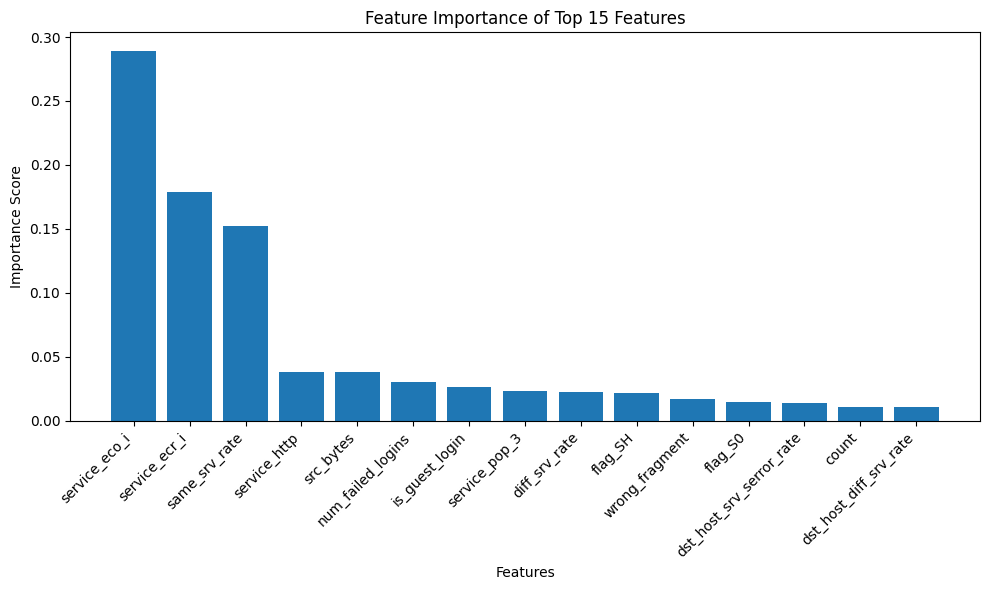

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'data' with your dataset)
data = new_train_df

# Separate features and labels
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Labels

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical labels into numerical values
y_encoded = label_encoder.fit_transform(y)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(verbosity=1)

# Initialize Stratified k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize list to store feature importance scores
feature_importance_scores = []

# Iterate through each fold
# print(X)
# for train_index, val_index in stratified_kfold.split(X, y_encoded):
#     print(train_index, val_index)
#     X_train, X_val = X[train_index], X[val_index]
#     y_train, y_val = y_encoded[train_index], y_encoded[val_index]

#     # Train XGBoost model
#     xgb_model.fit(X_train, y_train)

#     # Get feature importance scores
#     feature_importance_scores.append(xgb_model.feature_importances_)

# # Aggregate feature importance scores
# aggregated_feature_importance = sum(feature_importance_scores) / k_folds

# # Select top features based on importance scores
# num_selected_features = 10  # Number of top features to select
# selected_features_indices = aggregated_feature_importance.argsort()[::-1][:num_selected_features]
# selected_features = X.columns[selected_features_indices]

# print("Selected Features:", selected_features)
for train_index, val_index in stratified_kfold.split(X, y_encoded):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    # print(X_train)
    # Train XGBoost model
    xgb_model.fit(X_train, y_train)

    # Get feature importance scores
    feature_importance_scores.append(xgb_model.feature_importances_)

# Aggregate feature importance scores
aggregated_feature_importance = sum(feature_importance_scores) / k_folds

# Print feature importance of every feature
print("Feature Importance Scores:")
for feature, importance in zip(X.columns, aggregated_feature_importance):
    print(f"{feature}: {importance}")

# Create histogram plot showing feature importance of top 15 features
top_features_indices = aggregated_feature_importance.argsort()[::-1][:15]
top_features = X.columns[top_features_indices]
top_feature_importance = aggregated_feature_importance[top_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_feature_importance)
plt.title('Feature Importance of Top 15 Features')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame with feature importance sc
top_features

Index(['service_eco_i', 'service_ecr_i', 'same_srv_rate', 'service_http',
       'src_bytes', 'num_failed_logins', 'is_guest_login', 'service_pop_3',
       'diff_srv_rate', 'flag_SH', 'wrong_fragment', 'flag_S0',
       'dst_host_srv_serror_rate', 'count', 'dst_host_diff_srv_rate'],
      dtype='object')

In [ ]:
new_train_df["Class"].value_counts()

Class
Normal    77231
DoS       53386
Probe     14077
R2L        3702
U2R         119
Name: count, dtype: int64

In [ ]:
new_train_df.isnull().values.any()

False

In [ ]:
y_train=new_train_df["Class"]
y_train

0        Normal
1           DoS
2        Normal
3        Normal
4           DoS
          ...  
22538    Normal
22539    Normal
22540       DoS
22541    Normal
22542     Probe
Name: Class, Length: 148515, dtype: object

In [ ]:
y_train.isnull().values.any()

False

In [ ]:
combined_data_X = new_train_df.drop('Class', axis = 1)
combined_data_X = combined_data_X[top_features]
combined_data_X

,service_eco_i,service_ecr_i,same_srv_rate,service_http,src_bytes,num_failed_logins,is_guest_login,service_pop_3,diff_srv_rate,flag_SH,wrong_fragment,flag_S0,dst_host_srv_serror_rate,count,dst_host_diff_srv_rate
0,0.0,0.0,0.08,0.0,1.057999e-07,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.025440,0.60
1,0.0,0.0,0.05,0.0,0.000000e+00,0.0,0.0,0.0,0.07,0.0,0.0,1.0,1.00,0.240705,0.05
2,0.0,0.0,1.00,1.0,1.681203e-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.009785,0.00
3,0.0,0.0,1.00,1.0,1.442067e-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.058708,0.00
4,0.0,0.0,0.16,0.0,0.000000e+00,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.00,0.236791,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0.0,0.0,1.00,0.0,5.753774e-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.001957,0.06
22539,0.0,0.0,1.00,1.0,2.297162e-07,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.003914,0.00
22540,0.0,0.0,1.00,1.0,3.952277e-05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.009785,0.00
22541,0.0,0.0,1.00,0.0,3.043558e-08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.007828,0.01


In [ ]:
oos_pred = []

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=6,shuffle=True,random_state=42)
kfold.get_n_splits(combined_data_X,y_train)

6

In [ ]:
#Bidirectional RNN
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Bidirectional, LSTM, Reshape, Dropout, Dense, Activation

# Bidirectional RNN
batch_size = 32
model = Sequential()
model.add(Conv1D(64, kernel_size=15, padding="same", activation="relu", input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=5))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# batch_size = 32
# model = Sequential()
# model.add(Convolution1D(64, kernel_size=122, border_mode="same",activation="relu",input_shape=(122, 1)))
# model.add(MaxPooling1D(pool_length=(5)))
# model.add(BatchNormalization())
# model.add(Bidirectional(LSTM(64, return_sequences=False)))
# model.add(Reshape((128, 1), input_shape = (128, )))

# model.add(MaxPooling1D(pool_length=(5)))
# model.add(BatchNormalization())
# model.add(Bidirectional(LSTM(128, return_sequences=False)))

# model.add(Dropout(0.5))
# model.add(Dense(5))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# for layer in model.layers:
#     print(layer.shape())

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 15, 64)            1024      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 3, 64)             256       
 chNormalization)                                                
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                      

In [ ]:
count = 1
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    print("train index:",train_index)
    print("test index:",test_index)

    x_columns_train = top_features
    x_train_array = train_X[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))

    dummies = pd.get_dummies(train_y) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values

    x_columns_test = top_features
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))

    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values


    model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=10)

    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))

train index: [     0      1      3 ... 148512 148513 148514]
test index: [     2      5      7 ... 148504 148509 148511]
Epoch 1/10
3868/3868 [==============================] - 40s 8ms/step - loss: 0.2411 - accuracy: 0.9234 - val_loss: 0.1957 - val_accuracy: 0.9377
Epoch 2/10
3868/3868 [==============================] - 31s 8ms/step - loss: 0.1999 - accuracy: 0.9330 - val_loss: 0.1843 - val_accuracy: 0.9368
Epoch 3/10
3868/3868 [==============================] - 30s 8ms/step - loss: 0.1880 - accuracy: 0.9353 - val_loss: 0.1758 - val_accuracy: 0.9379
Epoch 4/10
3868/3868 [==============================] - 34s 9ms/step - loss: 0.1824 - accuracy: 0.9367 - val_loss: 0.1676 - val_accuracy: 0.9398
Epoch 5/10
3868/3868 [==============================] - 31s 8ms/step - loss: 0.1776 - accuracy: 0.9378 - val_loss: 0.1775 - val_accuracy: 0.9404
Epoch 6/10
3868/3868 [==============================] - 32s 8ms/step - loss: 0.1745 - accuracy: 0.9391 - val_loss: 0.1656 - val_accuracy: 0.9413
Epoch 7/1

In [ ]:
oos_pred

In [ ]:
dummies_test.columns

Index(['DoS', 'Normal', 'Probe', 'R2L', 'U2R'], dtype='object')

In [ ]:
test_y.value_counts()

Class
Normal    12871
DoS        8898
Probe      2346
R2L         617
U2R          20
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])

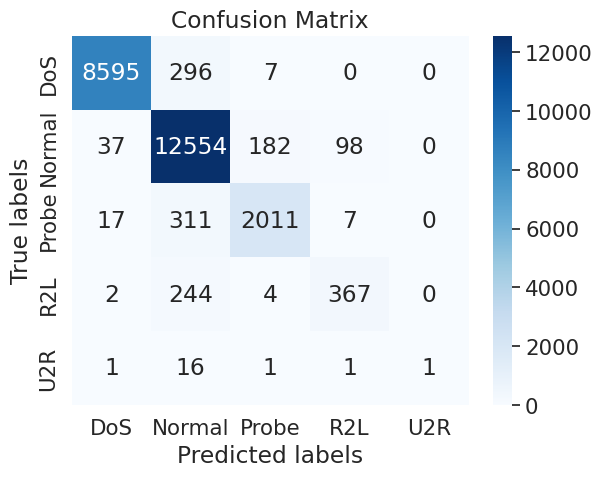

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'cm' is your confusion matrix
cm = confusion_matrix(y_eval, pred, labels=[0,1,2,3,4])

# Create a heatmap
sns.set(font_scale=1.4)  # Adjust font size
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['DoS', 'Normal', 'Probe', 'R2L', 'U2R'], yticklabels=['DoS', 'Normal', 'Probe', 'R2L', 'U2R'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cm)

[[ 8595   296     7     0     0]
 [   37 12554   182    98     0]
 [   17   311  2011     7     0]
 [    2   244     4   367     0]
 [    1    16     1     1     1]]


In [ ]:
cm.sum()

24752

In [ ]:
tp = 0
for i in range(5):
  for j in range(5):
    if i == j:
      tp = tp + cm[i][j]
tp_rate = (tp/24752)*100

print("True Positive Rate: " + str(tp_rate))

True Positive Rate: 95.05494505494505


In [ ]:
dr = (cm[0][0] + cm[2][2] + + cm[3][3] + + cm[4][4])/(8897+2347+617+19)
print("Detection Rate: " + str(dr))

Detection Rate: 0.9237373737373737
